In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\leowj\AppData\Local\Temp\ipykernel_34208\2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [3]:
# Create data

N = 30
x = torch.randn(N, 1) # create 30 random data points for x
y = x + torch.randn(N, 1) / 2 # create 30 random data points for y

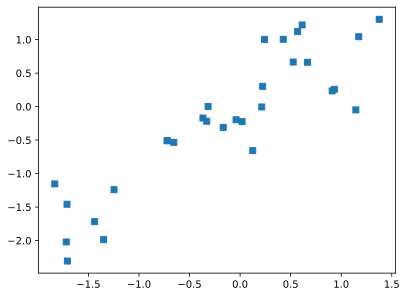

In [4]:
plt.plot(x, y, 's')
plt.show()

In [5]:
# build model
ANNreg = nn.Sequential(
    # no. of inputs = 1 (x), no. of outputs = 1 (y)
    nn.Linear(1, 1, bias=True), # input layer (takes in input from the world)
    nn.ReLU(), # activation fn
    nn.Linear(1, 1, bias=True) # output layer
)

ANNreg
# bias = True: bias term added by default

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# learning rate
lr = 0.5

# loss function
lossfun = nn.MSELoss()

# optimizer ()